In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

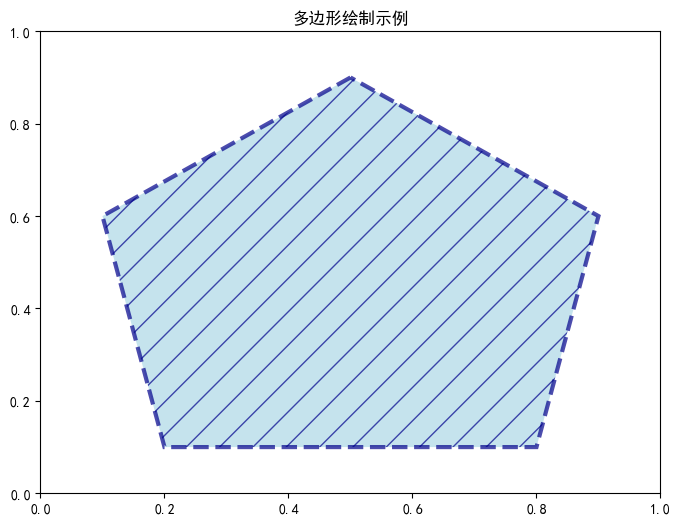

In [3]:
from matplotlib.patches import Polygon

fig, ax = plt.subplots(figsize=(8, 6))

# 定义多边形的顶点坐标
vertices = [(0.5, 0.9), (0.1, 0.6), (0.2, 0.1), (0.8, 0.1), (0.9, 0.6)]

# 创建多边形对象
triangle = Polygon(vertices, 
                   facecolor='lightblue',   # 填充颜色
                  edgecolor='darkblue',     # 边框颜色
                  linewidth=3,              # 边框宽度
                  linestyle='--',           # 边框样式
                  alpha=0.7,                # 透明度
                  hatch='/'                 # 填充图案
                  )

# 将多边形添加到坐标轴
ax.add_patch(triangle)

# 设置坐标轴范围
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.title('多边形绘制示例')
plt.show()

# 2、使用示例：

### 示例 1：绘制规则多边形

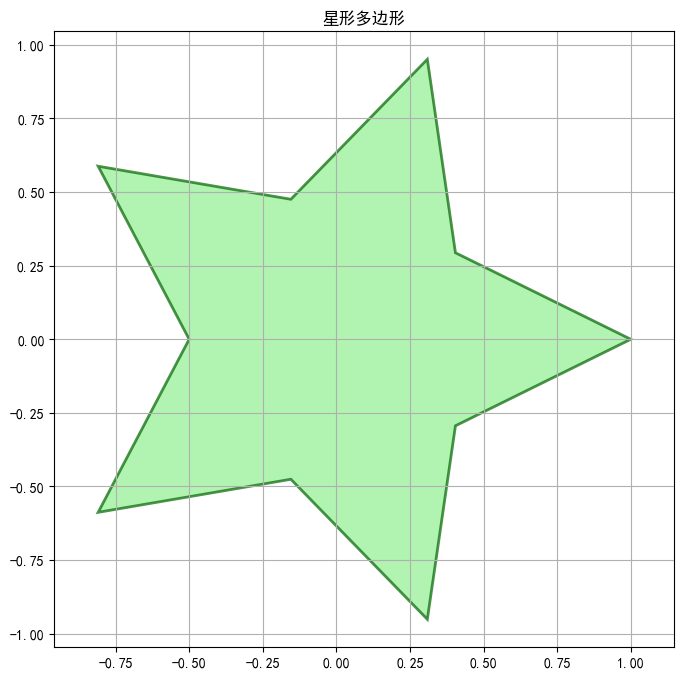

In [4]:
from matplotlib.patches import Polygon

def create_star_vertices(outer_radius=1, inner_radius=0.5, points=5):
    """
    生成星形多边形的顶点坐标
    
    参数:
        outer_radius: 星形外顶点（尖端）到中心的距离，默认1
        inner_radius: 星形内顶点（凹点）到中心的距离，默认0.5
        points: 星形的角数量，默认5（即五角星）
    
    返回:
        vertices: 包含所有顶点(x,y)坐标的numpy数组，形状为(2*points, 2)
    """
    # 生成均匀分布的角度，总数量为角数的2倍（每个角对应一个外顶点和一个内顶点）
    angles = np.linspace(0, 2*np.pi, 2*points, endpoint=False)
    # 创建半径数组：外顶点使用outer_radius，内顶点使用inner_radius
    radii = np.array([outer_radius if i % 2 == 0 else inner_radius 
                     for i in range(2*points)])
    # 计算每个顶点的(x,y)坐标：x = 半径 * cos(角度)，y = 半径 * sin(角度)
    vertices = np.array([(radii[i]*np.cos(angles[i]), radii[i]*np.sin(angles[i])) 
                        for i in range(2*points)])
    
    return vertices


fig, ax = plt.subplots(figsize=(8, 8))

# 生成五角星顶点坐标
star_vertices = create_star_vertices(points=5)

# 创建多边形对象
star_polygon = Polygon(
    star_vertices, 
    closed=True, 
    alpha=0.7,      
    facecolor='lightgreen',
    edgecolor='darkgreen',
    linewidth=2
)

# 将多边形添加到轴上
ax.add_patch(star_polygon)

# 设置x轴和y轴的显示范围，确保星形完全显示
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
plt.grid(True)
plt.title('星形多边形')
plt.axis('equal')
plt.show()

### 示例 2：标记数据分布区域

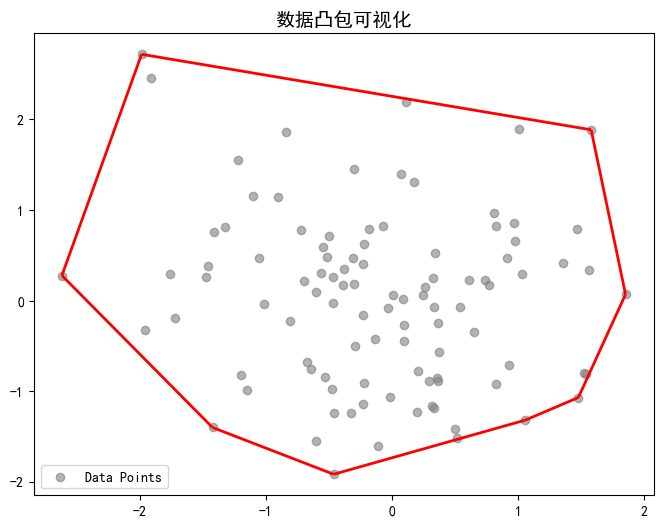

In [5]:
from matplotlib.patches import Polygon

# 生成随机数据点
np.random.seed(42)
x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 1, 100)

# 定义并计算凸包多边形（需安装scipy）
from scipy.spatial import ConvexHull
points = np.column_stack([x, y])
# 计算点集的凸包，hull对象包含凸包的所有信息（顶点、面等）
hull = ConvexHull(points)

fig, ax = plt.subplots(figsize=(8, 6))
# 绘制原始数据点
ax.scatter(x, y, color='gray', alpha=0.6, label='Data Points')

# 绘制凸包多边形
# hull.simplices存储凸包的所有面（对于2D数据，每个面是一条边对应的两个顶点索引）
for simplex in hull.simplices:
    # 根据顶点索引获取对应的坐标点，创建多边形对象
    polygon = Polygon(points[simplex], 
                      closed=True, 
                      edgecolor='red', 
                      fill=False, 
                      lw=2)
    ax.add_patch(polygon)

ax.set_title("数据凸包可视化", fontsize=14)
ax.legend()
plt.show()

### 示例 3：结合Shapely库绘制复杂几何图形

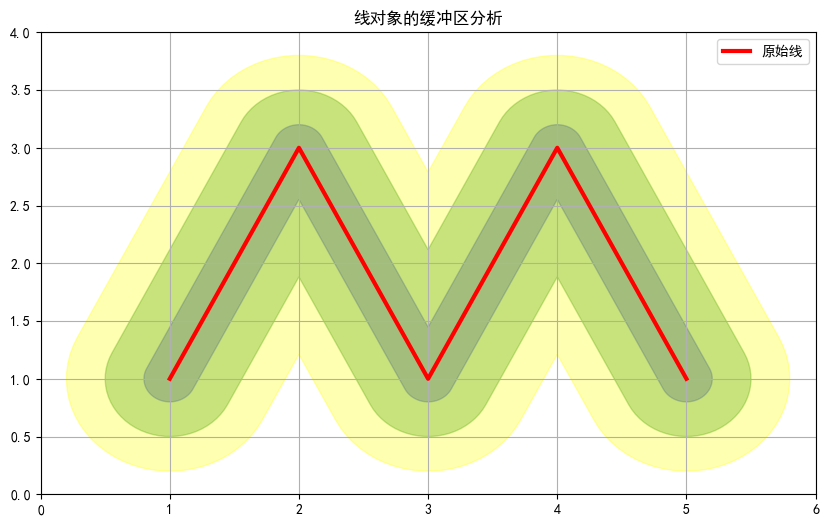

In [6]:
from matplotlib.patches import Polygon
from shapely.geometry import Polygon as ShapelyPolygon
from shapely.geometry import Point, LineString

# 创建一个线对象
line = LineString([(1, 1), (2, 3), (3, 1), (4, 3), (5, 1)])

# 创建不同距离的缓冲区
buffers = [line.buffer(0.2), line.buffer(0.5), line.buffer(0.8)]

# 绘制
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制原始线
x, y = line.xy
ax.plot(x, y, 'r-', linewidth=3, label='原始线')

# 绘制缓冲区
colors = ['blue', 'green', 'yellow']
for buf, color in zip(buffers, colors):
    coords = np.array(buf.exterior.coords)
    patch = Polygon(coords, alpha=0.3, color=color)
    ax.add_patch(patch)


ax.set_xlim(0, 6)
ax.set_ylim(0, 4)
plt.title('线对象的缓冲区分析')
plt.legend()
plt.grid(True)
plt.show()